#### Features/Column Description :-

1) X1 - Relative Compactness<br>
2) X2 - Surface Area<br>
3) X3 - Wall Area<br>
4) X4 - Roof Area<br>
5) X5 - Overall Height<br>
6) X6 - Orientation<br>
7) X7 - Glazing Area<br>
8) X8 - Glazing Area Distrbution<br>
9) Y1 - Heating Load<br>
10) Y2 - Cooling Load


<b>Regression Task</b><br>
Use the given dataset and perform the following:-
<ol>
<li> Read the 'heat_load.xlsx' dataset.</li>
<li> Rename the columns as per the given features</li> 
<li> Remove/handle null values if any</li>    
<li> Considering all the features as independent features (except heating and cooling load) Split the dataset into training and test dataset with test_size = 25%</li>
<li> Predict the Heating load based on features from X1 to X8 and also calculate
the model score. Also find the intercept and the coefficients corresponding to
each of these features. Generate equation of Linear regression</li>
<li>Predict the Cooling load based on features from X1 to X8 and also calculate
the model score. Also find the intercept and the coefficients corresponding 
to each of these features. Generate equation of Linear regression</li>
<li> Compute MSE, MAE, RMSE for two scenarios(5 and 6)</li> 
<li>Select appropriate independent features based on Correlation matrix</li>
<li>Repeat Q5 and Q7 for heating load after the original dataset has been split into training and testing dataset with test_szie=25% with appropriate independent features selected from correlation matrix</li>
<li>Repeat Q6 and Q7 for cooling load after the original dataset has been split into training and testing dataset with test_szie=25% with appropriate independent features selected from correlation matrix</li>   
</ol>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/heat_load.xlsx')

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
df.rename(columns={'X1':'Relative Compactness','X2':'Surface Area','X3' :'Wall Area','X4' :'Roof Area','X5':'Overall Height',
                   'X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area Distrbution',
                   'Y1':'Heating Load','Y2' : 'Cooling Load'},inplace=True)

In [ ]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
df.isnull().sum()

Relative Compactness        0
Surface Area                0
Wall Area                   0
Roof Area                   0
Overall Height              0
Orientation                 0
Glazing Area                0
Glazing Area Distrbution    0
Heating Load                0
Cooling Load                0
dtype: int64

In [ ]:
x = df.iloc[:,:-2]
y = df.iloc[:,-2:]

In [ ]:
y.squeeze()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [ ]:
yH = y.iloc[:,:-1]
yC = y.iloc[:,-1]

In [ ]:
yH = yH.squeeze()

In [ ]:
type(yC)

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xH_train,xH_test,yH_train,yH_test = train_test_split(x,yH,test_size=0.25)
xC_train,xC_test,yC_train,yC_test = train_test_split(x,yC,test_size=0.25)

In [ ]:
xH_test

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution
257,0.79,637.0,343.0,147.00,7.0,3,0.10,5
556,0.71,710.5,269.5,220.50,3.5,2,0.40,1
280,0.64,784.0,343.0,220.50,3.5,2,0.10,5
194,0.98,514.5,294.0,110.25,7.0,4,0.10,4
269,0.71,710.5,269.5,220.50,3.5,3,0.10,5
...,...,...,...,...,...,...,...,...
79,0.71,710.5,269.5,220.50,3.5,5,0.10,1
304,0.79,637.0,343.0,147.00,7.0,2,0.25,1
273,0.69,735.0,294.0,220.50,3.5,3,0.10,5
4,0.90,563.5,318.5,122.50,7.0,2,0.00,0


In [ ]:
yH_test

257    36.71
556    14.51
280    15.16
194    24.04
269    10.70
       ...  
79     10.75
304    38.67
273    11.14
4      20.84
148    28.07
Name: Heating Load, Length: 192, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
hlr = LinearRegression()
clr = LinearRegression()

In [ ]:
hlr.fit(xH_train,yH_train)
clr.fit(xC_train,yC_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yH_pred = hlr.predict(xH_test)
yC_pred = clr.predict(xC_test)

Score of the model on Heating and Cooling Load


In [ ]:
a=hlr.score(xH_train,yH_train)*100
b=clr.score(xC_train,yC_train)*100
c=hlr.score(xH_test,yH_test)*100
d=clr.score(xC_test,yC_test)*100
print('training score of heating model : ',a,'%')
print('training score of cooling model : ',b,'%')
print('testing score of  heating model : ',c,'%')
print('testing score of cooling model : ',d,'%')

training score of heating model :  91.81773806364285 %
training score of cooling model :  89.1260940762807 %
testing score of  heating model :  90.80766625554972 %
testing score of cooling model :  87.71909230261532 %


coefficient and intercept for Heating loading 

In [ ]:
print('co_efficient for heating load: ',hlr.coef_)
print('intercept for heating load: ',hlr.intercept_)

co_efficient for heating load:  [-6.19614670e+01 -1.15161453e+11  1.15161453e+11  2.30322907e+11
  4.22122037e+00  8.65725055e-02  1.94255851e+01  2.75009081e-01]
intercept for heating load:  78.36050133030022


co_eficient and intercept for Cooling load

In [ ]:
print('co_efficient for cooling load: ',clr.coef_)
print('intercept for cooling load: ',clr.intercept_)

co_efficient for cooling load:  [-7.66177079e+01 -7.32031320e-02  2.22595928e-02 -4.77313624e-02
  4.18968399e+00  5.18230952e-02  1.46086154e+01  3.99538363e-02]
intercept for cooling load:  107.84371098053961


In [ ]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error

Regression metrics for Heating load


In [ ]:
MAE = mean_absolute_error(yH_test,yH_pred)
MSE = mean_squared_error(yH_test,yH_pred)
RMSE = (MSE)**0.5
print('mean absolute error for Heating load: ',MAE)
print('mean square error for Heating load: ',MSE)
print('mean root square error for Heating load: ',RMSE)

mean absolute error for Heating load:  2.193115635519361
mean square error for Heating load:  9.244617763623898
mean root square error for Heating load:  3.0404963021888216


Regression metrics for Cooling Load

In [ ]:
MAE = mean_absolute_error(yC_test,yC_pred)
MSE = mean_squared_error(yC_test,yC_pred)
RMSE = (MSE)**0.5
print('mean absolute error for Cooling load: ',MAE)
print('mean square error for Cooling load: ',MSE)
print('mean root square error for Cooling load: ',RMSE)

mean absolute error for Cooling load:  2.4414629490525495
mean square error for Cooling load:  11.582041020020156
mean root square error for Cooling load:  3.4032397829157084


Generating equation for Heating load 

In [ ]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distrbution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [ ]:
dfHC = df.copy()

In [ ]:
dfHC['Pred_Heating_load_eq'] = df['Relative Compactness']*hlr.coef_[0] + df['Surface Area']*hlr.coef_[1] + df['Wall Area']*hlr.coef_[2] + df['Roof Area']*hlr.coef_[3] + df['Overall Height']*hlr.coef_[4] + df['Orientation']*hlr.coef_[5] + df['Glazing Area']*hlr.coef_ [6] + df['Glazing Area Distrbution']*hlr.coef_[7] + hlr.intercept_
                        

Generating equation for Cooling load

In [ ]:
dfHC['Pred_Cooling_load_eq'] = df['Relative Compactness']*clr.coef_[0] + df['Surface Area']*clr.coef_[1] + df['Wall Area']*clr.coef_[2] + df['Roof Area']*clr.coef_[3] + df['Overall Height']*clr.coef_[4] + df['Orientation']*clr.coef_[5] + df['Glazing Area']*clr.coef_ [6] + df['Glazing Area Distrbution']*clr.coef_[7] + clr.intercept_

Checking after transform in columns

In [ ]:
dfHC.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution,Heating Load,Cooling Load,Pred_Heating_load_eq,Pred_Cooling_load_eq
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,22.347814,25.808718
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,22.434386,25.860541
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,22.520959,25.912364
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,22.607531,25.964187
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,24.711095,28.311832


In [ ]:
df.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


Graphical represantion of correlation matrix of data set on heating and cooling load to define strong and weak relation  with each features

In [ ]:
corrh = df.iloc[:,:-1]
corrc = df.iloc[:,[0,1,2,3,4,5,6,7,-1]]

In [ ]:
corrc = corrc.corr()
corrh = corrh.corr()

correaltion matrix on heating load

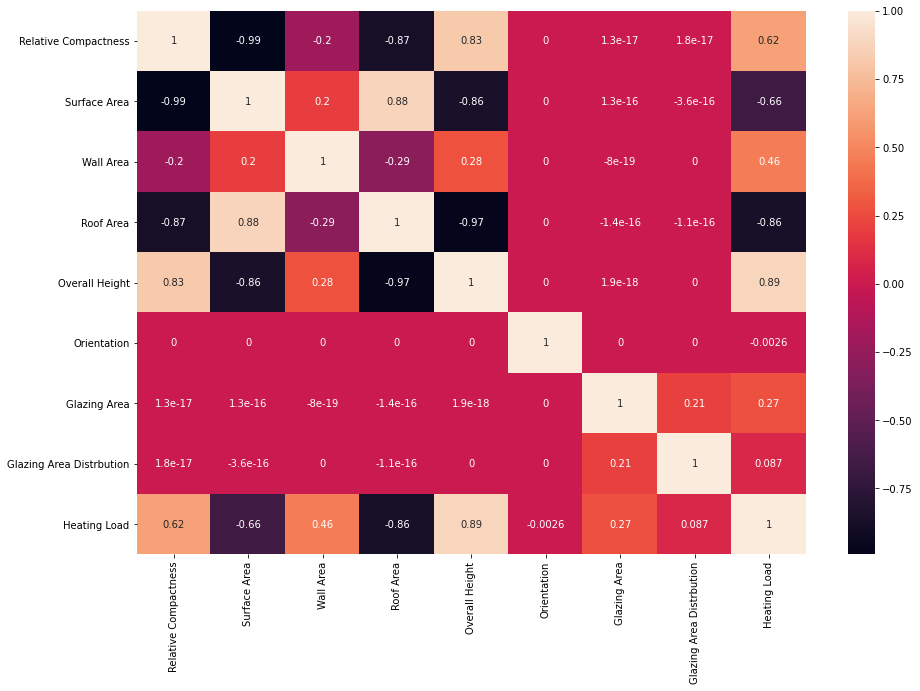

In [ ]:
plt.figure(1,figsize=(15,10))
sns.heatmap(corrh,annot= True)
plt.show()

correlation matrix on cooling load

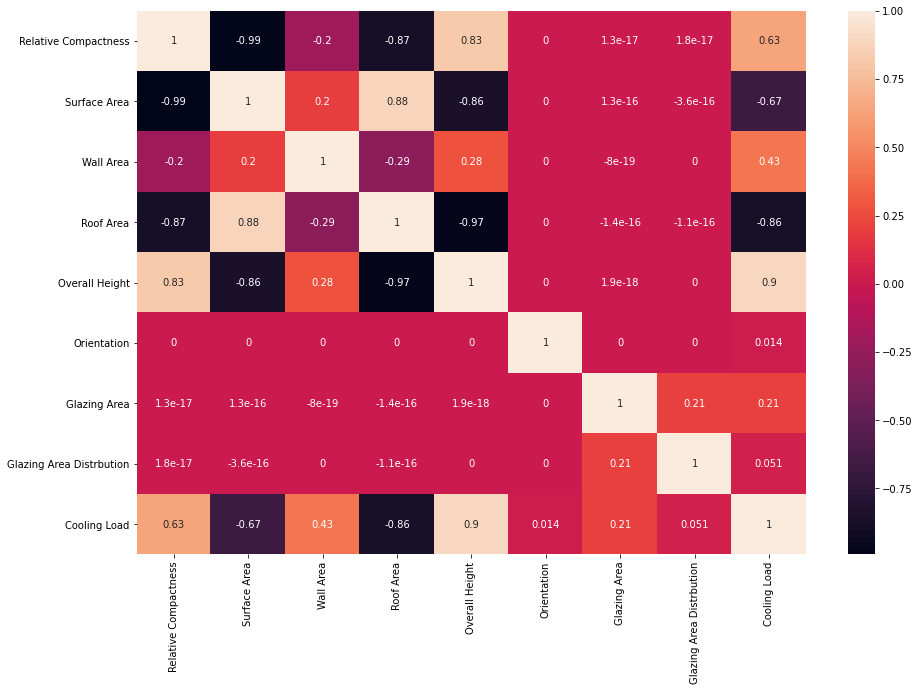

In [ ]:
plt.figure(1,figsize=(15,10))
sns.heatmap(corrc,annot= True)
plt.show()

In [ ]:
dfH = df.iloc[:,[0,2,4,6,7,-2]]
dfC = df.iloc[:,[0,2,4,6,7,-1]]

Heating Load Appropriate independent features

In [ ]:
dfH.head()

,Relative Compactness,Wall Area,Overall Height,Glazing Area,Glazing Area Distrbution,Heating Load
0,0.98,294.0,7.0,0.0,0,15.55
1,0.98,294.0,7.0,0.0,0,15.55
2,0.98,294.0,7.0,0.0,0,15.55
3,0.98,294.0,7.0,0.0,0,15.55
4,0.90,318.5,7.0,0.0,0,20.84


In [ ]:
xh = dfH.iloc[:,:-1]
yh = dfH.iloc[:,-1]

Train test split on Heating  load

In [ ]:
xh_train,xh_test,yh_train,yh_test = train_test_split(xh,yh,test_size=0.25)

In [ ]:
xh_train.head(3)

,Relative Compactness,Wall Area,Overall Height,Glazing Area,Glazing Area Distrbution
101,0.90,318.5,7.0,0.1,2
598,0.76,416.5,7.0,0.4,2
709,0.66,318.5,3.5,0.4,4


In [ ]:
yh_test.head(3)

304    38.670
95     13.020
30      6.366
Name: Heating Load, dtype: float64

In [ ]:
hcmlr = LinearRegression()

In [ ]:
hcmlr.fit(xh_train,yh_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Score of model with appropriate feature

In [ ]:
w=hcmlr.score(xh_train,yh_train)*100

y=hcmlr.score(xh_test,yh_test)*100

print('training score of heating model : ',w,'%')

print('testing score of  heating model : ',y,'%')


training score of heating model :  91.39149808295643 %
testing score of  heating model :  90.92006857133367 %


slope and intercept of appropriate features of Heating load

In [ ]:
print('the coefficient of heating load on appropriate feature: ', hcmlr.coef_)
print('the intercept of heating load on appropriate feature: ',hcmlr.intercept_)

the coefficient of heating load on appropriate feature:  [-9.60451326  0.03978399  5.23985414 19.79395631  0.17970675]
the intercept of heating load on appropriate feature:  -15.76929463425163


In [ ]:
yh_pred = hcmlr.predict(xh_test)

Regression metrics score on heating load

In [ ]:
MAE = mean_absolute_error(yh_test,yh_pred)
MSE = mean_squared_error(yh_test,yh_pred)
RMSE = (MSE)**0.5
print('mean absolute error for Heating load on appropriate feature: ',MAE)
print('mean square error for Heating load appropriate feature: ',MSE)
print('mean root square error for Heating load appropriate feature: ',RMSE)

mean absolute error for Heating load on appropriate feature:  2.286140110232831
mean square error for Heating load appropriate feature:  9.93136724621307
mean root square error for Heating load appropriate feature:  3.1514071850862226


In [ ]:
dfH['predicted heating load'] = hcmlr.predict(xh)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfH.columns

Index(['Relative Compactness', 'Wall Area', 'Overall Height', 'Glazing Area',
       'Glazing Area Distrbution', 'Heating Load', 'predicted heating load'],
      dtype='object')

In [ ]:
dfH['Pred_Heating_load_eq'] = df['Relative Compactness']*hcmlr.coef_[0] + df['Wall Area']*hcmlr.coef_[1] + df['Overall Height']*hcmlr.coef_[2] + df['Glazing Area']*hcmlr.coef_[3] + df['Glazing Area Distrbution']*hcmlr.coef_[4] + hcmlr.intercept_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfH

,Relative Compactness,Wall Area,Overall Height,Glazing Area,Glazing Area Distrbution,Heating Load,predicted heating load,Pred_Heating_load_eq
0,0.98,294.0,7.0,0.0,0,15.55,23.193755,23.193755
1,0.98,294.0,7.0,0.0,0,15.55,23.193755,23.193755
2,0.98,294.0,7.0,0.0,0,15.55,23.193755,23.193755
3,0.98,294.0,7.0,0.0,0,15.55,23.193755,23.193755
4,0.90,318.5,7.0,0.0,0,20.84,24.936824,24.936824
...,...,...,...,...,...,...,...,...
763,0.64,343.0,3.5,0.4,5,17.88,18.885332,18.885332
764,0.62,367.5,3.5,0.4,5,16.54,20.052130,20.052130
765,0.62,367.5,3.5,0.4,5,16.44,20.052130,20.052130
766,0.62,367.5,3.5,0.4,5,16.48,20.052130,20.052130


Dataset related upon the appropriate independent Features on Heating  load

Cooling Load Appropriate independent features

In [ ]:
dfC

,Relative Compactness,Wall Area,Overall Height,Glazing Area,Glazing Area Distrbution,Cooling Load
0,0.98,294.0,7.0,0.0,0,21.33
1,0.98,294.0,7.0,0.0,0,21.33
2,0.98,294.0,7.0,0.0,0,21.33
3,0.98,294.0,7.0,0.0,0,21.33
4,0.90,318.5,7.0,0.0,0,28.28
...,...,...,...,...,...,...
763,0.64,343.0,3.5,0.4,5,21.40
764,0.62,367.5,3.5,0.4,5,16.88
765,0.62,367.5,3.5,0.4,5,17.11
766,0.62,367.5,3.5,0.4,5,16.61


In [ ]:
xc = dfC.iloc[:,:-1]
yc = dfC.iloc[:,-1]

In [ ]:
yc

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Cooling Load, Length: 768, dtype: float64

Train test split on cooling load

In [ ]:
xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size=0.25)

In [ ]:
xc_train

,Relative Compactness,Wall Area,Overall Height,Glazing Area,Glazing Area Distrbution
146,0.98,294.0,7.0,0.10,3
682,0.86,294.0,7.0,0.40,4
134,0.66,318.5,3.5,0.10,2
161,0.79,343.0,7.0,0.10,3
64,0.79,343.0,7.0,0.10,1
...,...,...,...,...,...
98,0.98,294.0,7.0,0.10,2
378,0.64,343.0,3.5,0.25,2
72,0.74,245.0,3.5,0.10,1
216,0.74,245.0,3.5,0.10,4


In [ ]:
yc_test

245    29.52
416    14.92
273    14.28
717    16.79
567    17.95
       ...  
635    31.60
597    40.40
425    20.03
102    29.36
191    13.89
Name: Cooling Load, Length: 192, dtype: float64

In [ ]:
ccmlr = LinearRegression()
ccmlr.fit(xc_train,yc_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Score of model with appropriate feature

In [ ]:
x=ccmlr.score(xc_train,yc_train)*100
z=ccmlr.score(xc_test,yc_test)*100
print('training score of cooling model : ',b,'%')
print('testing score of cooling model : ',z,'%')

training score of cooling model :  89.1260940762807 %
testing score of cooling model :  88.10418271133285 %


slope and intercept of appropriate features of cooling load

In [ ]:
print('the coefficient of Cooling load on appropriate feature: ', ccmlr.coef_)
print('the intercept of Cooling load on appropriate feature: ',ccmlr.intercept_)

the coefficient of Cooling load on appropriate feature:  [-2.23925328e+01  1.50276787e-02  5.87642556e+00  1.48464918e+01
  8.33512102e-02]
the intercept of Cooling load on appropriate feature:  2.238849817435966


In [ ]:
yc_pred = ccmlr.predict(xc_test)

Regressioon metrics on cooling load

In [ ]:
MAE = mean_absolute_error(yc_test,yc_pred)
MSE = mean_squared_error(yc_test,yc_pred)
RMSE = (MSE)**0.5
print('mean absolute error for cooling load on appropriate feature: ',MAE)
print('mean square error for cooling load appropriate feature: ',MSE)
print('mean root square error for cooling load appropriate feature: ',RMSE)

mean absolute error for cooling load on appropriate feature:  2.425840568938281
mean square error for cooling load appropriate feature:  10.805271553125811
mean root square error for cooling load appropriate feature:  3.2871372884511243


In [ ]:
dfC['predicted cooling load'] = ccmlr.predict(xc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfC['Pred_Cooling_load_eq'] = df['Relative Compactness']*ccmlr.coef_[0] + df['Wall Area']*ccmlr.coef_[1] + df['Overall Height']*ccmlr.coef_[2] + df['Glazing Area']*ccmlr.coef_[3] + df['Glazing Area Distrbution']*ccmlr.coef_[4] + ccmlr.intercept_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfC

,Relative Compactness,Wall Area,Overall Height,Glazing Area,Glazing Area Distrbution,Cooling Load,predicted cooling load,Pred_Cooling_load_eq
0,0.98,294.0,7.0,0.0,0,21.33,25.847284,25.847284
1,0.98,294.0,7.0,0.0,0,21.33,25.847284,25.847284
2,0.98,294.0,7.0,0.0,0,21.33,25.847284,25.847284
3,0.98,294.0,7.0,0.0,0,21.33,25.847284,25.847284
4,0.90,318.5,7.0,0.0,0,28.28,28.006865,28.006865
...,...,...,...,...,...,...,...,...
763,0.64,343.0,3.5,0.4,5,21.40,19.984965,19.984965
764,0.62,367.5,3.5,0.4,5,16.88,20.800994,20.800994
765,0.62,367.5,3.5,0.4,5,17.11,20.800994,20.800994
766,0.62,367.5,3.5,0.4,5,16.61,20.800994,20.800994


Dataset related upon the cooling load of apropriate feature

In [ ]:
############################################   END  ######################################